# Building a model set in delimitpy

In [8]:
from delimitpy import generate_models

## Parse the configuration file.

First, we use the ModelConfigParser class to parse the information from our configuration file.

In [12]:
config_parser = generate_models.ModelConfigParser("../../config.txt")
config_values = config_parser.parse_config()

## Build the models, and get parameters

Next, we use functions from the ModelBuilder class to generate a baseline set of models (without parameters).<br>

Then, we use draw_parameters to draw parameterized models from the parameter space.<br>

This will return three lists of lists.<br>

* The first list of lists will contain one list for each divergence model, and each item in that list will be a list of *n* parameterizations of that model, where *n* is the value provided by the user for the number of replicates in the configuraiton file.<br>

* The second list of lists will contain one list for each secondary contact model, and each item in that list will be a  list of *n* parameterizations of that model, where *n* is the value provided by the user for the number of replicates in the configuraiton file.<br>

* The third list of lists will contain one list for each divergence with gene flow model, and each item in that list will be a  list of *n* parameterizations of that model, where *n* is the value provided by the user for the number of replicates in the configuraiton file.

In [13]:
# build the models
model_builder = generate_models.ModelBuilder(config_values)
model_builder.build_models()

# parameterize the models
parameterized_divergence_demographies, parameterized_sc_demographies, parameterized_dwg_demographies = model_builder.draw_parameters()

INFO:delimitpy.generate_models:Creating 14 different models based on user input.


## Plot the models 

Now, we must ask "Are these the models I'm looking for?"

One way to easily check this is by plotting the models. The validate_models function takes as input your lists returned from the parameterization command above (draw_parameters). For each model, it will draw one parameterization at random, and plot it using functionality from the drawdemes package.

Make sure the models look like you hoped they would! Remember, you are only seeing a single parameterization for each model.

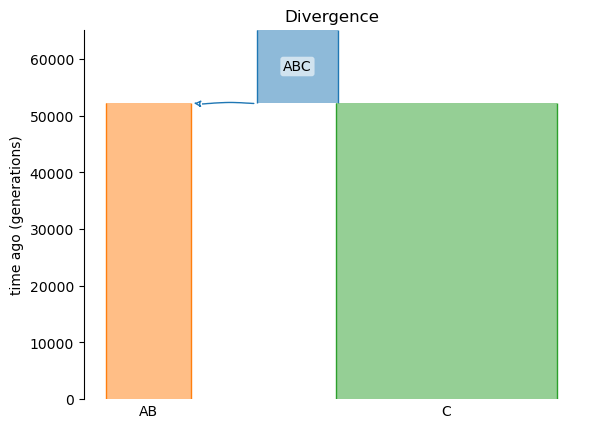

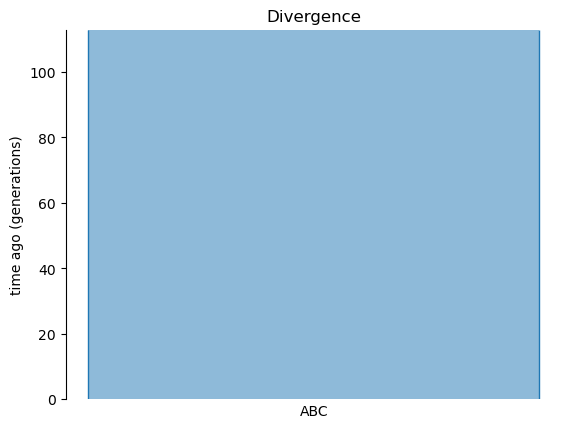

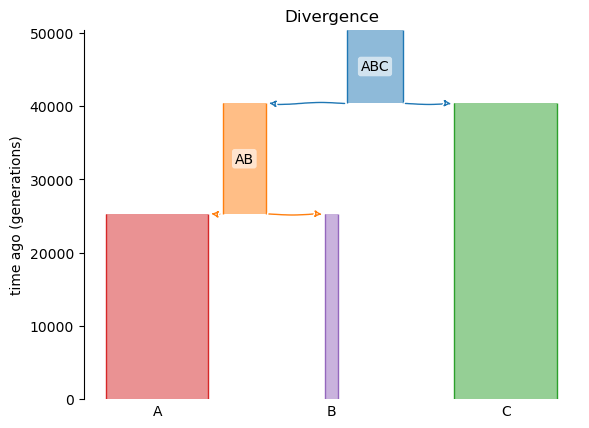

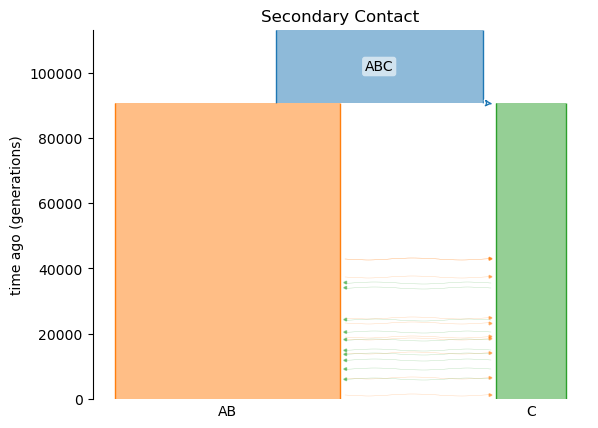

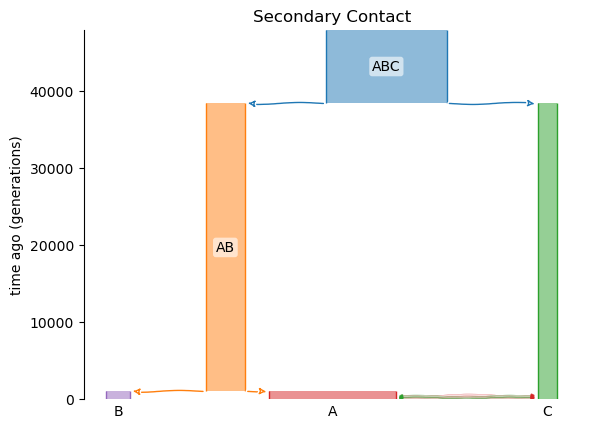

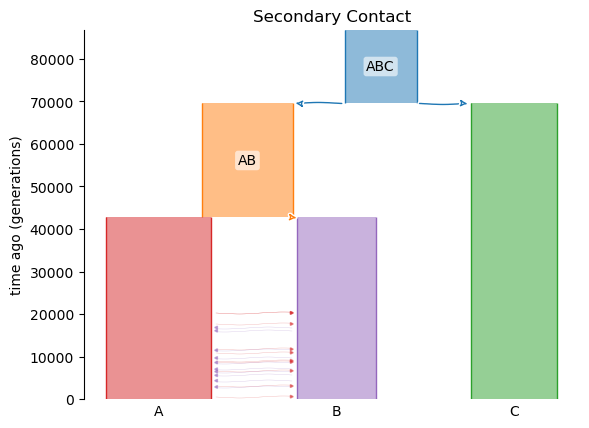

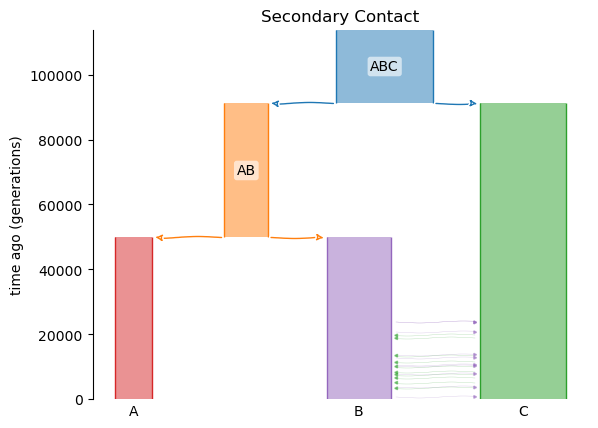

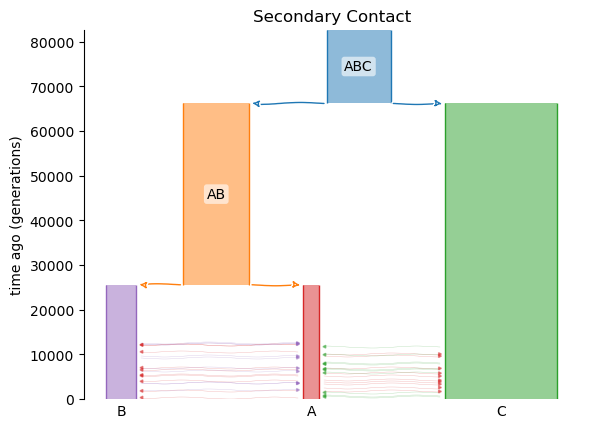

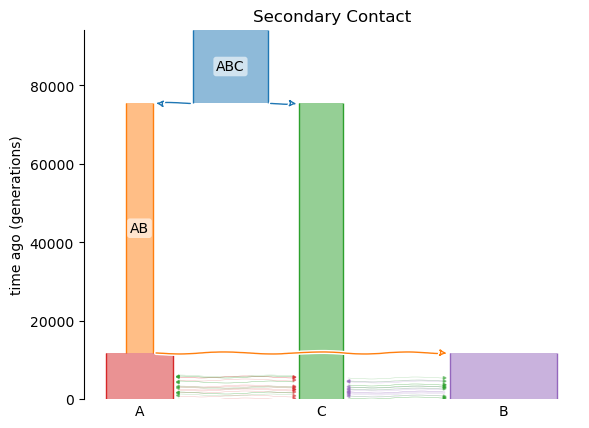

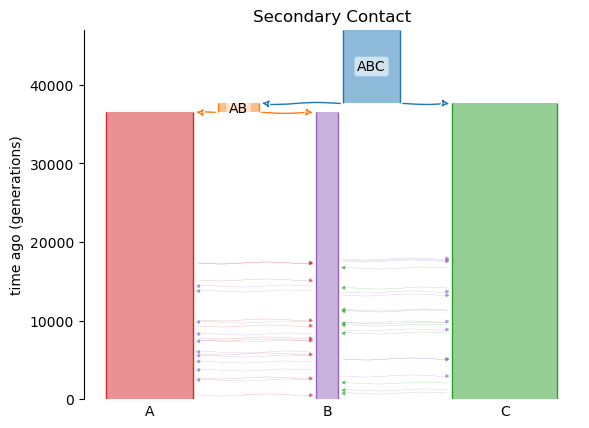

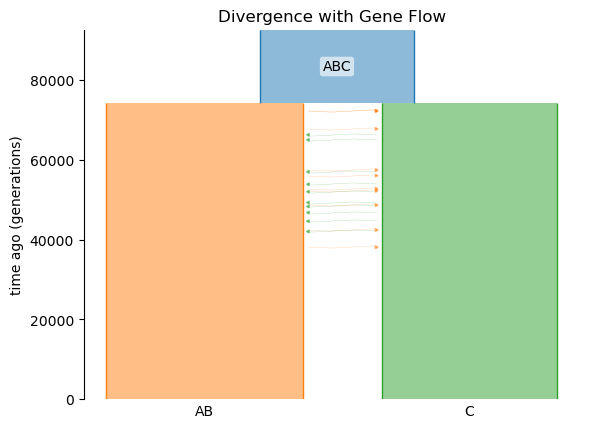

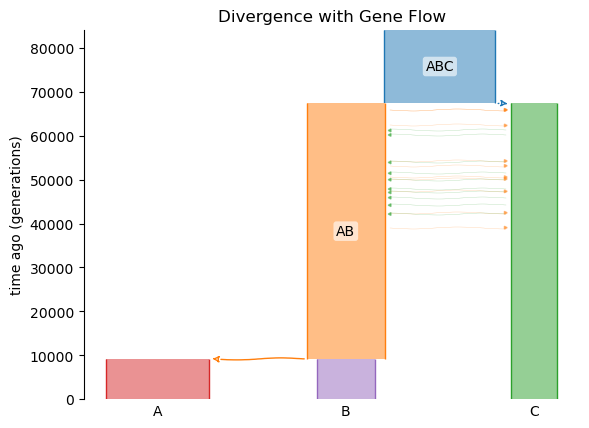

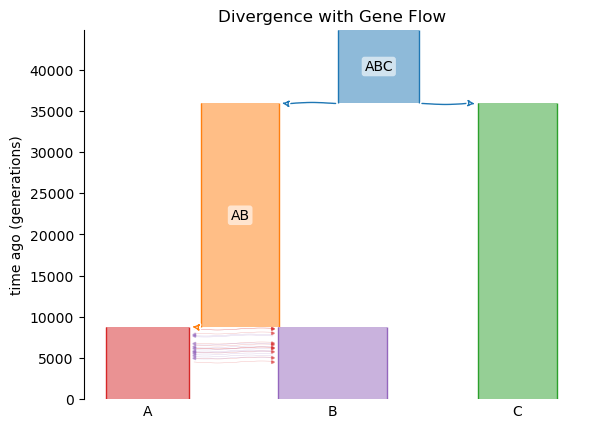

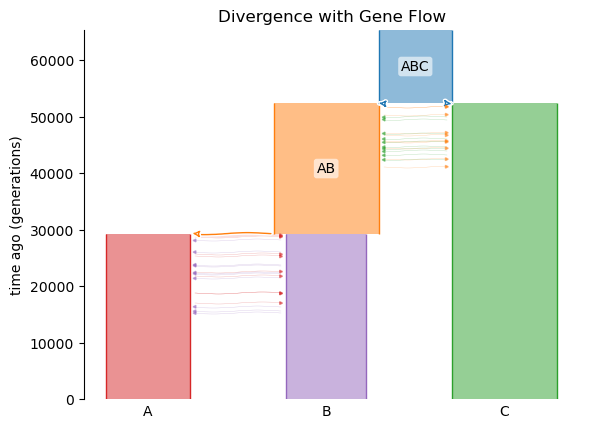

In [15]:
model_builder.validate_models(parameterized_divergence_demographies, parameterized_sc_demographies, parameterized_dwg_demographies)